In [1]:
import os
import numpy as np
import pandas as pd
import h5py 

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

In [2]:
from visual_behavior_ophys.dataset.visual_behavior_scientifica_dataset import VisualBehaviorScientificaDataset
from visual_behavior_ophys.response_analysis.response_analysis import ResponseAnalysis 
from visual_behavior_ophys.plotting_tools import summary_figures as sf


In [3]:
specimen_id = 599659785

In [4]:
analysis_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\BehaviorImaging\DoC\2P6_data_analysis'
base_dir = r"\\allen\programs\braintv\production\neuralcoding\prod0\specimen_"
data_dir = os.path.join(base_dir+str(specimen_id))

# plot figures if analysis has not yet been run

*****response_dataframe.h5 already in 639253368 *****
*****experiment folder is empty for \\allen\programs\braintv\production\neuralcoding\prod0\specimen_599659785\ophys_session_640070359 *****
*****response_dataframe.h5 already in 639932228 *****
*****response_dataframe.h5 already in 639438856 *****
*****analyzing 639119169 *****
creating dataset object
Visual frames detected in sync: 215789
2P frames detected in sync: 111670
170927
visual frames in pkl file: 215789
Loading \\allen\programs\braintv\workgroups\neuralcoding\Behavior\Data\M334310\output\170927150910-task=DoC_NaturalImages_Ophys_SessionA_stage=natural_images_ophys_sessionA_mouse=M334310.pkl
stim type is  

c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\dataset\visual_behavior_scientifica_dataset.py:209: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  running_speed_cm_per_sec = pd.rolling_mean(running_speed_cm_per_sec, window=6)


images
length of traces: 111668
number of segmented cells: 90
creating response analysis object
length of traces: 111668
number of segmented cells: 90
generating response dataframe


c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\response_analysis\response_analysis.py:175: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  (_, p) = stats.f_oneway(trace[baseline_start:baseline_end], trace[stim_start:stim_end])


saving response dataframe


C:\Anaconda\lib\site-packages\pandas\core\generic.py:1138: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['response', 'response_timestamps', 'run_speed', 'run_timestamps', 'lick_times', 'initial_image', 'change_image', 'trial_type', 'behavioral_response_type']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


creating mean response dataframe
creating cell summary dataframe
creating cell summary dataframe
generating experiment summary figures


c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  table_data['external_specimen_id'] = 'M'+str(table_data['external_specimen_id'].values[0])
c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py:2755: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  table_data['experiment_date'] = str(table_data['experiment_date'].values[0])[:10]
c:\users\marinag\documents\code\visual_behavior_o

generating cell summary figures


c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py:1574: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  trace = tdf.mean_trace.values[0][frames_range[0]:frames_range[1]]
c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py:1575: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sem = tdf.sem_trace.values[0][frames_range[0]:frames_range[1]]
c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py:1628: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  trace = tdf.mean_trace.values[0][frames_range[0]:frames_range[1]]
c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py

*****analyzing 639769395 *****
creating dataset object
Visual frames detected in sync: 215783
2P frames detected in sync: 111659
171002
visual frames in pkl file: 215783
Loading \\allen\programs\braintv\workgroups\neuralcoding\Behavior\Data\M334310\output\171002143740-task=DoC_NaturalImages_Ophys_SessionC_stage=natural_images_ophys_session_C_mouse=M334310.pkl
stim type is  images
length of traces: 111656
number of segmented cells: 176
creating response analysis object
length of traces: 111656
number of segmented cells: 176
generating response dataframe
saving response dataframe
creating mean response dataframe
creating cell summary dataframe
creating cell summary dataframe
generating experiment summary figures
generating cell summary figures


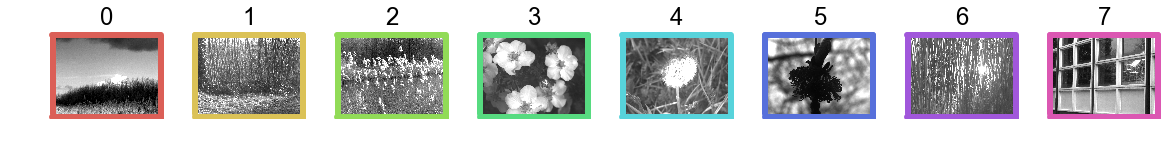

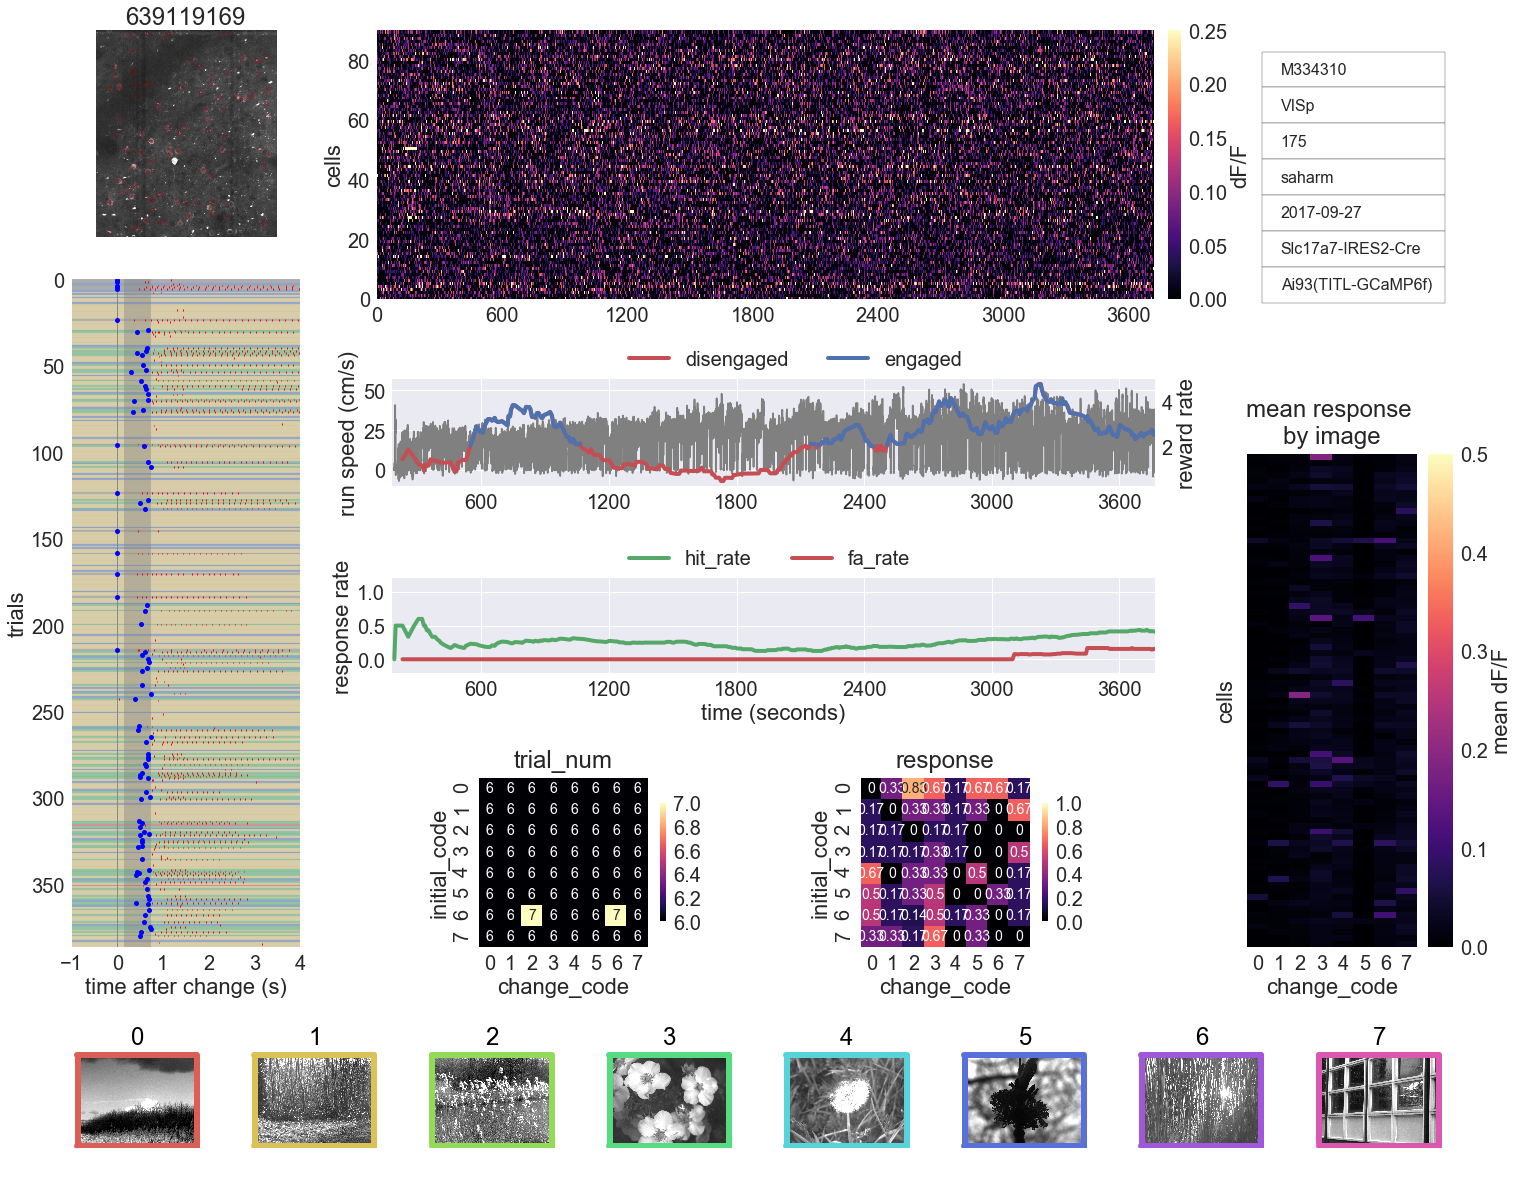

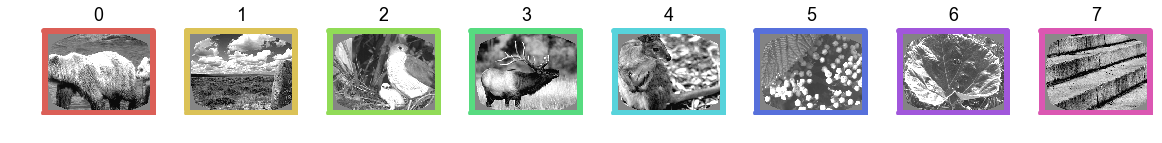

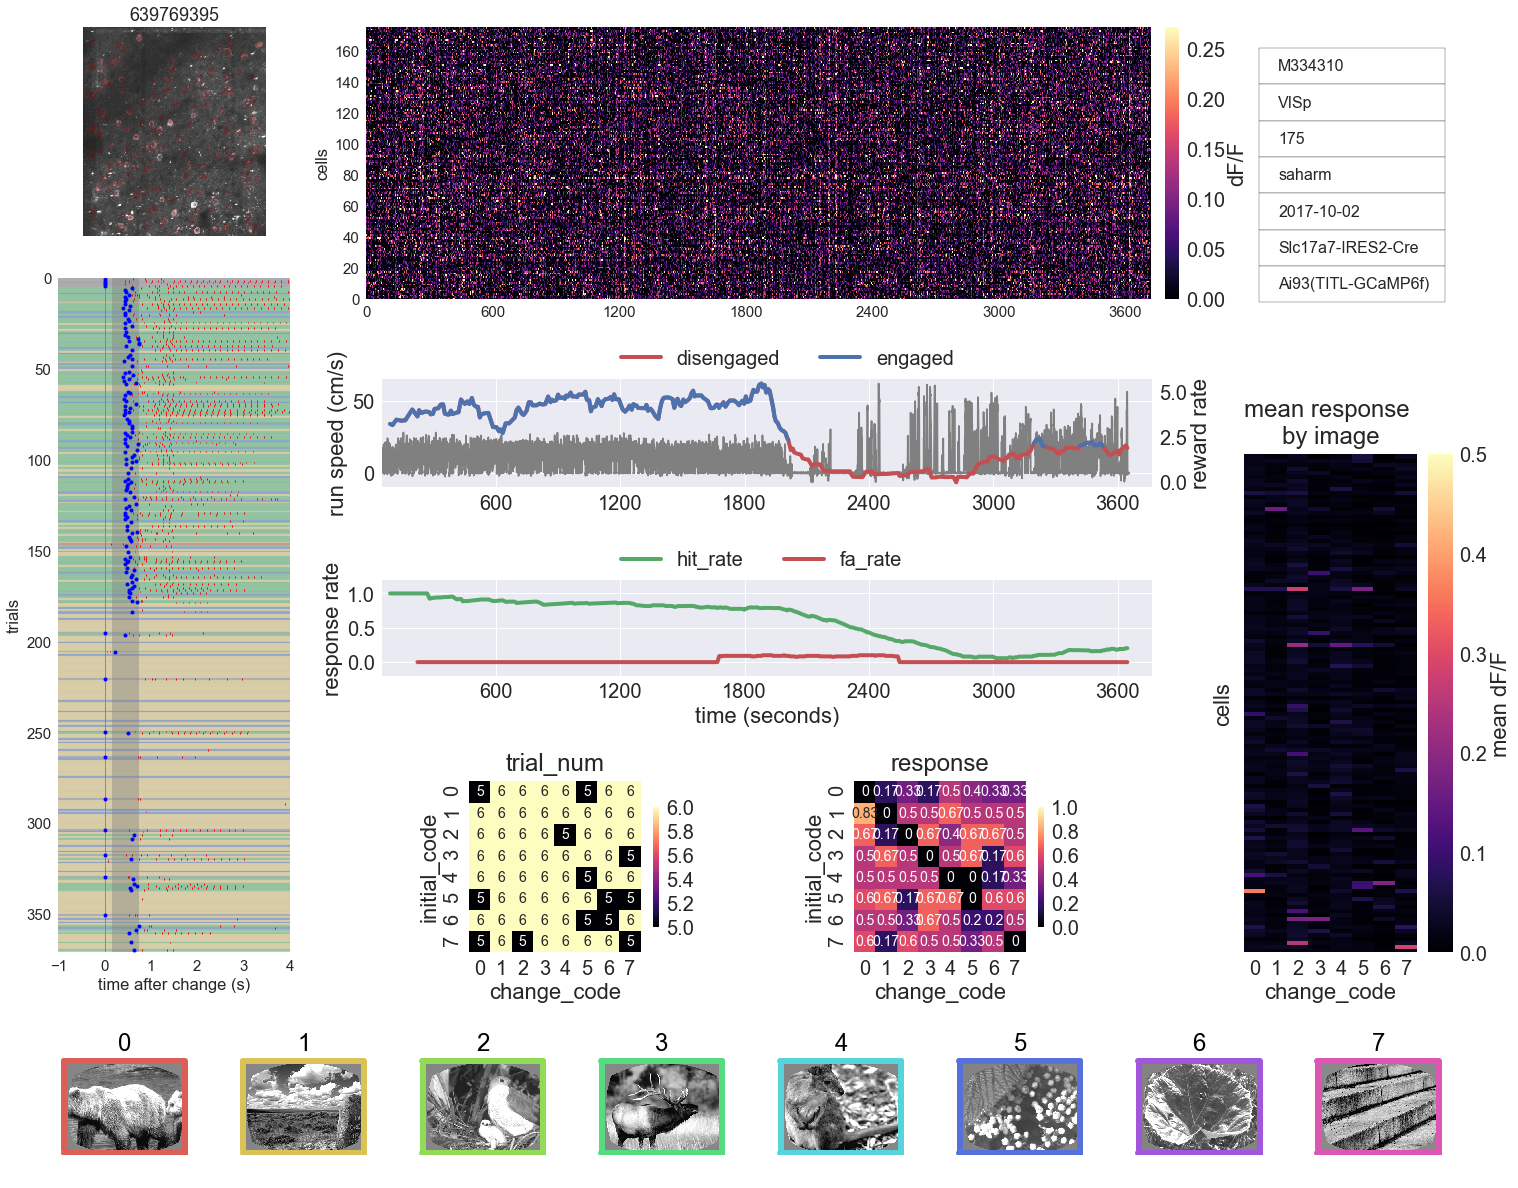

In [5]:
for session_folder in [folder for folder in os.listdir(data_dir) if 'ophys_session' in folder]:
    ophys_session_dir = os.path.join(data_dir,session_folder)
    expt_folder = [folder for folder in os.listdir(ophys_session_dir) if 'ophys_experiment' in folder]
    if len(expt_folder)>0:
        lims_id = expt_folder[0][-9:]
        analysis_folder = [folder for folder in os.listdir(analysis_dir) if str(lims_id) in folder]
        if (len(analysis_folder)==0) or ('response_dataframe.h5' not in os.listdir(os.path.join(analysis_dir,analysis_folder[0]))):
            try:
                print '*****analyzing',lims_id,'*****'
                print 'creating dataset object'
                dataset= VisualBehaviorScientificaDataset(lims_id, analysis_dir=analysis_dir)

                print 'creating response analysis object'
                ra = ResponseAnalysis(dataset)
                rdf = ra.response_df
                mdf = ra.mean_response_df
                sdf = ra.get_cell_summary_df(p_val_thresh=0.005, sd_over_baseline_thresh=3)

                print 'generating experiment summary figures'
                sf.plot_images(dataset,mdf,save=True);
                sf.plot_experiment_summary_figure(dataset, mdf, sdf, save=True)
                sf.plot_behavior_events_trace(dataset, ra.response_df.cell.unique(), xmin=360, length=5, ax=None, save=True)
                print 'generating cell summary figures'
                for cell in mdf.cell.unique():
                    sf.plot_cell_summary_figure(dataset,ra, cell, save=True)
            except: 
                print '*****problem for',lims_id,'*****'
        else: 
            print '*****response_dataframe.h5 already in',lims_id,'*****'
    else: 
         print '*****experiment folder is empty for',os.path.join(ophys_session_dir),'*****'

## plot figures regardless of whether response_dataframe exists or not

In [ ]:
for session_folder in [folder for folder in os.listdir(data_dir) if 'ophys_session' in folder]:
    ophys_session_dir = os.path.join(data_dir,session_folder)
    expt_folder = [folder for folder in os.listdir(ophys_session_dir) if 'ophys_experiment' in folder]
    if len(expt_folder)>0:
        lims_id = expt_folder[0][-9:]
        analysis_folder = [folder for folder in os.listdir(analysis_dir) if str(lims_id) in folder]
#         try:
        print '*****analyzing',lims_id,'*****'
        print 'creating dataset object'
        dataset= VisualBehaviorScientificaDataset(lims_id, analysis_dir=analysis_dir)

        print 'creating response analysis object'
        ra = ResponseAnalysis(dataset)
        rdf = ra.response_df
        mdf = ra.mean_response_df
        sdf = ra.get_cell_summary_df(p_val_thresh=0.005, sd_over_baseline_thresh=3)

        print 'generating experiment summary figures'
        sf.plot_images(dataset,mdf,save=True);
        sf.plot_experiment_summary_figure(dataset, mdf, sdf, save=True)
        sf.plot_behavior_events_trace(dataset, ra.response_df.cell.unique(), xmin=360, length=5, ax=None, save=True)
        print 'generating cell summary figures'
        for cell in mdf.cell.unique():
            sf.plot_cell_summary_figure(dataset,ra, cell, save=True)
#         except: 
#             print '*****problem for',lims_id,'*****'
    else: 
         print '*****experiment folder is empty for',os.path.join(ophys_session_dir),'*****'

*****analyzing 639253368 *****
creating dataset object
Visual frames detected in sync: 215694
2P frames detected in sync: 111648
170928
visual frames in pkl file: 215694
Loading \\allen\programs\braintv\workgroups\neuralcoding\Behavior\Data\M334310\output\170928155439-task=DoC_NaturalImages_Ophys_SessionA_stage=natural_images_ophys_session_A_mouse=M334310.pkl
stim type is  images


c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\dataset\visual_behavior_scientifica_dataset.py:209: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  running_speed_cm_per_sec = pd.rolling_mean(running_speed_cm_per_sec, window=6)


length of traces: 111640
number of segmented cells: 101
creating response analysis object
length of traces: 111640
number of segmented cells: 101
generating response dataframe


c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\response_analysis\response_analysis.py:175: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  (_, p) = stats.f_oneway(trace[baseline_start:baseline_end], trace[stim_start:stim_end])


saving response dataframe


C:\Anaconda\lib\site-packages\pandas\core\generic.py:1138: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['response', 'response_timestamps', 'run_speed', 'run_timestamps', 'lick_times', 'initial_image', 'change_image', 'trial_type', 'behavioral_response_type']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


creating mean response dataframe
creating cell summary dataframe
creating cell summary dataframe
generating experiment summary figures


c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  table_data['external_specimen_id'] = 'M'+str(table_data['external_specimen_id'].values[0])
c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py:2755: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  table_data['experiment_date'] = str(table_data['experiment_date'].values[0])[:10]
c:\users\marinag\documents\code\visual_behavior_o

generating cell summary figures


c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py:1574: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  trace = tdf.mean_trace.values[0][frames_range[0]:frames_range[1]]
c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py:1575: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sem = tdf.sem_trace.values[0][frames_range[0]:frames_range[1]]
c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py:1628: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  trace = tdf.mean_trace.values[0][frames_range[0]:frames_range[1]]
c:\users\marinag\documents\code\visual_behavior_ophys\visual_behavior_ophys\plotting_tools\summary_figures.py

*****experiment folder is empty for \\allen\programs\braintv\production\neuralcoding\prod0\specimen_599659785\ophys_session_640070359 *****
*****analyzing 639932228 *****
creating dataset object
Visual frames detected in sync: 215785
2P frames detected in sync: 111638
171003
visual frames in pkl file: 215785
Loading \\allen\programs\braintv\workgroups\neuralcoding\Behavior\Data\M334310\output\171003142638-task=DoC_NaturalImages_Ophys_SessionD_stage=natural_images_ophys_session_D_mouse=M334310.pkl
stim type is  images
length of traces: 111632
number of segmented cells: 179
creating response analysis object
length of traces: 111632
number of segmented cells: 179
generating response dataframe
saving response dataframe
creating mean response dataframe
creating cell summary dataframe
creating cell summary dataframe
generating experiment summary figures
generating cell summary figures
*****analyzing 639438856 *****
creating dataset object
Visual frames detected in sync: 215790
2P frames dete

In [13]:
# sf.plot_traces_heatmap(dataset, save=True,cbar=True,ax=None)

In [14]:
# for cell in mdf.cell.unique():
#     sf.plot_transition_type_heatmap(ra, [cell], vmax=np.percentile(dataset.dff_traces[cell, :], 99.9), ax=None, cmap='magma', colorbar=False,save=True);

In [15]:
# for trace in dataset.dff_traces
# sf.plot_trace(timestamps, trace, ax=None, xlabel='seconds', ylabel='dF/F')

In [40]:
dataset.stim_codes.stim_code.values

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)